In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, LSTM, Dropout, concatenate
from tensorflow.keras.optimizers import Adam

In [40]:
# Load dataset
data = pd.read_csv("dataset.csv")

In [41]:
# Drop unnecessary columns
data.drop(columns=['index'], inplace=True)

In [42]:
# Split features and target
X = data.drop(columns=['Target'])
y = data['Target']

In [43]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
# ANN Model
def build_ann_model(input_dim):
    input_layer = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(input_layer)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# CNN Model
def build_cnn_model(input_dim):
    input_layer = Input(shape=(input_dim, 1))
    x = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['binary_accuracy'])
    return model

In [47]:
# RNN Model
def build_rnn_model(input_dim):
    input_layer = Input(shape=(input_dim, 1))
    x = LSTM(64)(input_layer)
    x = Dense(64, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [48]:
# CNN + ANN Model
def build_cnn_ann_model(input_dim):
    input_layer = Input(shape=(input_dim, 1))
    x1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
    x1 = Flatten()(x1)
    
    input_ann = Input(shape=(input_dim,))
    x2 = Dense(32, activation='relu')(input_ann)
    
    merged = concatenate([x1, x2])
    x = Dense(64, activation='relu')(merged)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_layer, input_ann], outputs=output)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [49]:
def build_cnn_rnn_model(input_dim):
    input_seq = Input(shape=(input_dim, 1))
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(input_seq)
    x = LSTM(64, return_sequences=True)(x)  # Ensuring output remains 3D
    x = GlobalMaxPooling1D()(x)  # Now the shape will be correct
    x = Dense(64, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_seq, outputs=output)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [50]:
def build_cnn_rnn_ann_model(input_dim, ann_input_dim):
    seq_input = Input(shape=(input_dim, 1))
    x1 = Conv1D(filters=64, kernel_size=3, activation='relu')(seq_input)
    x1 = LSTM(64, return_sequences=True)(x1)
    x1 = GlobalMaxPooling1D()(x1)

    feat_input = Input(shape=(ann_input_dim,))
    x2 = Dense(32, activation='relu')(feat_input)

    merged = concatenate([x1, x2])
    x = Dense(64, activation='relu')(merged)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[seq_input, feat_input], outputs=output)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [51]:
# Train models
def train_and_plot(model, X_train, X_test, y_train, y_test, title):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [52]:
# Reshape data for CNN & RNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8396 - loss: 0.3931 - val_accuracy: 0.9218 - val_loss: 0.1846
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9363 - loss: 0.1631 - val_accuracy: 0.9331 - val_loss: 0.1632
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9434 - loss: 0.1356 - val_accuracy: 0.9385 - val_loss: 0.1483
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9560 - loss: 0.1119 - val_accuracy: 0.9403 - val_loss: 0.1398
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9542 - loss: 0.1078 - val_accuracy: 0.9521 - val_loss: 0.1298
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9625 - loss: 0.0895 - val_accuracy: 0.9493 - val_loss: 0.1269
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9682 - loss: 0.0815 - val_accuracy: 0.9539 - val_loss: 0.1220
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.0772 - val_accuracy: 0.

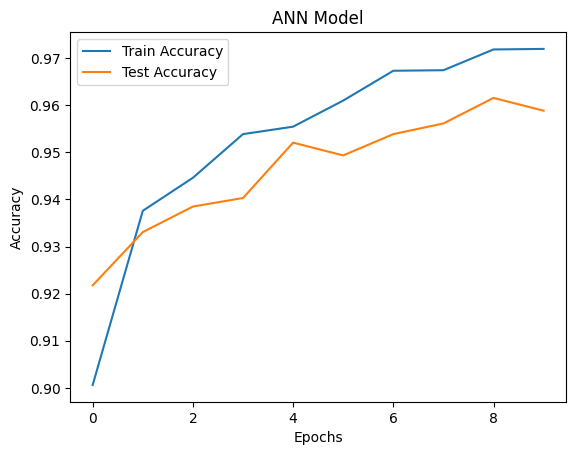

In [53]:

# Train ANN model
ann_model = build_ann_model(X_train.shape[1])
train_and_plot(ann_model, X_train, X_test, y_train, y_test, 'ANN Model')

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9078 - loss: 0.2476 - val_accuracy: 0.9281 - val_loss: 0.1680
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9365 - loss: 0.1538 - val_accuracy: 0.9358 - val_loss: 0.1530
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9379 - loss: 0.1466 - val_accuracy: 0.9353 - val_loss: 0.1427
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9433 - loss: 0.1277 - val_accuracy: 0.9403 - val_loss: 0.1361
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9465 - loss: 0.1245 - val_accuracy: 0.9457 - val_loss: 0.1302
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9539 - loss: 0.1162 - val_accuracy: 0.9403 - val_loss: 0.1471
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9554 - loss: 0.1061 - val_accuracy: 0.9408 - val_loss: 0.1233
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9514 - loss: 0.1097 - val_accuracy: 0.

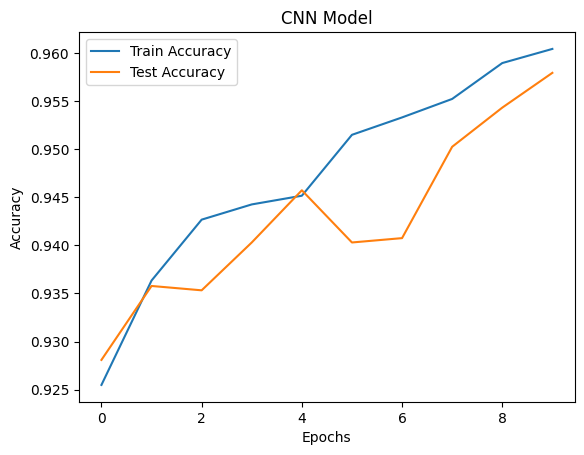

In [54]:
# Train CNN model
cnn_model = build_cnn_model(X_train.shape[1])
train_and_plot(cnn_model, X_train_reshaped, X_test_reshaped, y_train, y_test, 'CNN Model')

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6762 - loss: 0.5772 - val_accuracy: 0.7924 - val_loss: 0.4553
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8267 - loss: 0.3953 - val_accuracy: 0.8553 - val_loss: 0.3334
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8527 - loss: 0.3394 - val_accuracy: 0.8679 - val_loss: 0.3271
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8710 - loss: 0.3081 - val_accuracy: 0.8815 - val_loss: 0.2969
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8754 - loss: 0.2964 - val_accuracy: 0.8797 - val_loss: 0.2945
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8767 - loss: 0.2991 - val_accuracy: 0.8788 - val_loss: 0.2956
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8757 - loss: 0.2930 - val_accuracy: 0.8896 - val_loss: 0.2811
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8880 - loss: 0.2716 - val_accuracy: 0.

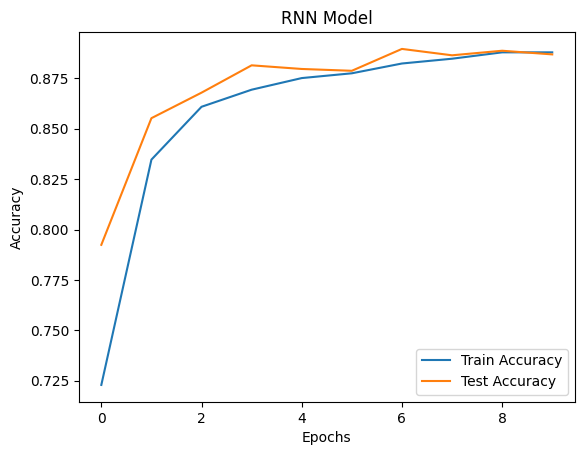

In [55]:
# Train RNN model
rnn_model = build_rnn_model(X_train.shape[1])
train_and_plot(rnn_model, X_train_reshaped, X_test_reshaped, y_train, y_test, 'RNN Model')

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9044 - loss: 0.2431 - val_accuracy: 0.9349 - val_loss: 0.1525
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9427 - loss: 0.1382 - val_accuracy: 0.9367 - val_loss: 0.1452
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9450 - loss: 0.1315 - val_accuracy: 0.9426 - val_loss: 0.1370
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9545 - loss: 0.1116 - val_accuracy: 0.9502 - val_loss: 0.1250
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9528 - loss: 0.1076 - val_accuracy: 0.9462 - val_loss: 0.1241
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9567 - loss: 0.1046 - val_accuracy: 0.9484 - val_loss: 0.1197
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9628 - loss: 0.0882 - val_accuracy: 0.9462 - val_loss: 0.1150
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9693 - loss: 0.0807 - val_accuracy: 0.

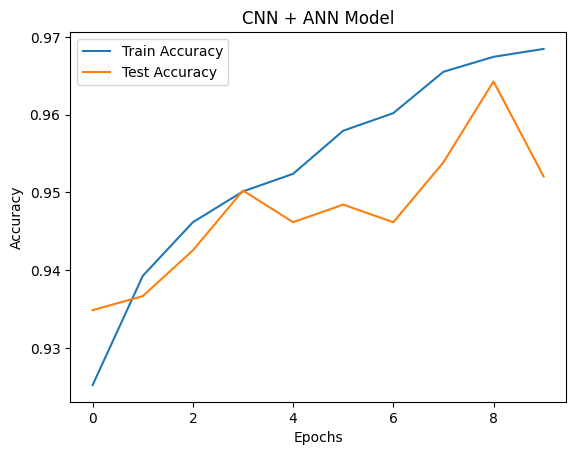

In [56]:
# Train CNN + ANN model
cnn_ann_model = build_cnn_ann_model(X_train.shape[1])
train_and_plot(cnn_ann_model, [X_train_reshaped, X_train], [X_test_reshaped, X_test], y_train, y_test, 'CNN + ANN Model')


Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6949 - loss: 0.5611 - val_accuracy: 0.8661 - val_loss: 0.3371
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8666 - loss: 0.3062 - val_accuracy: 0.8833 - val_loss: 0.2822
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8947 - loss: 0.2535 - val_accuracy: 0.9014 - val_loss: 0.2413
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9059 - loss: 0.2339 - val_accuracy: 0.9009 - val_loss: 0.2320
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9111 - loss: 0.2178 - val_accuracy: 0.9127 - val_loss: 0.2017
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9229 - loss: 0.1824 - val_accuracy: 0.9118 - val_loss: 0.2029
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9308 - loss: 0.1687 - val_accuracy: 0.9213 - val_loss: 0.1829
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9326 - loss: 0.1631 - val_accuracy: 0

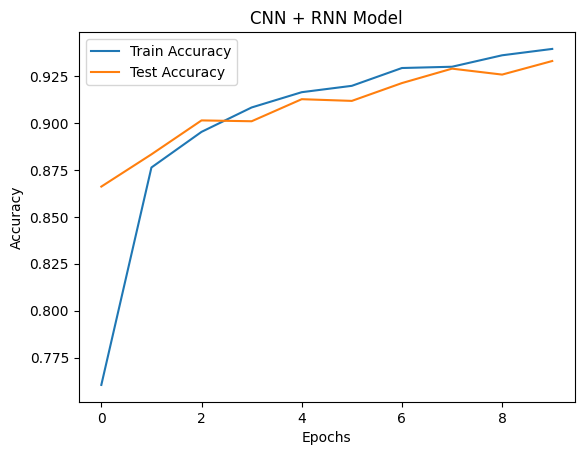

In [58]:
cnn_rnn_model = build_cnn_rnn_model(X_train_reshaped.shape[1])
train_and_plot(cnn_rnn_model, X_train_reshaped, X_test_reshaped, y_train, y_test, 'CNN + RNN Model')

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8475 - loss: 0.3672 - val_accuracy: 0.9313 - val_loss: 0.1841
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9318 - loss: 0.1731 - val_accuracy: 0.9349 - val_loss: 0.1673
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9407 - loss: 0.1575 - val_accuracy: 0.9344 - val_loss: 0.1625
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9408 - loss: 0.1415 - val_accuracy: 0.9389 - val_loss: 0.1532
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9496 - loss: 0.1296 - val_accuracy: 0.9426 - val_loss: 0.1465
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9496 - loss: 0.1248 - val_accuracy: 0.9439 - val_loss: 0.1372
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9511 - loss: 0.1151 - val_accuracy: 0.9475 - val_loss: 0.1317
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9605 - loss: 0.0983 - val_accuracy: 0

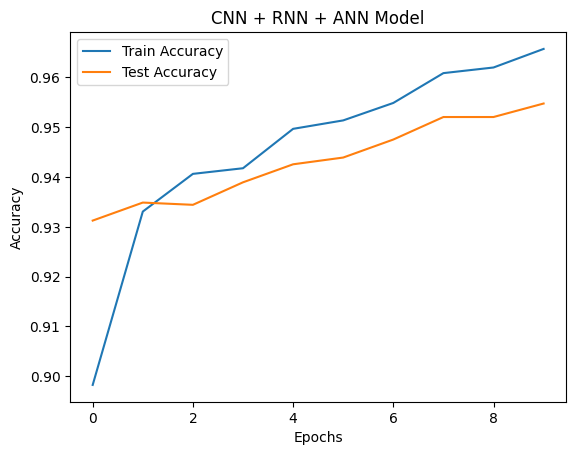

In [61]:
cnn_rnn_ann_model = build_cnn_rnn_ann_model(X_train_reshaped.shape[1], X_train.shape[1])
train_and_plot(cnn_rnn_ann_model, [X_train_reshaped, X_train], [X_test_reshaped, X_test], y_train, y_test, 'CNN + RNN + ANN Model')

In [76]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [77]:
# List of all trained models
models = {
    "ANN Model": ann_model,
    "CNN Model": cnn_model,
    "RNN Model": rnn_model,
    "CNN + ANN Model": cnn_ann_model,
    "CNN + RNN Model": cnn_rnn_model,
    "CNN + RNN + ANN Model": cnn_rnn_ann_model
}


Evaluating ANN Model...

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step


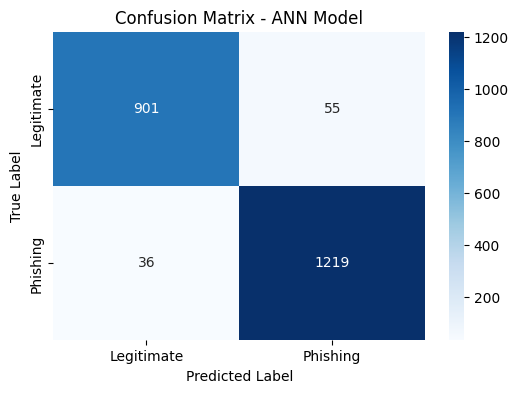

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       956
           1       0.96      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211


Evaluating CNN Model...

Error in CNN Model: as_list() is not defined on an unknown TensorShape.

Evaluating RNN Model...

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


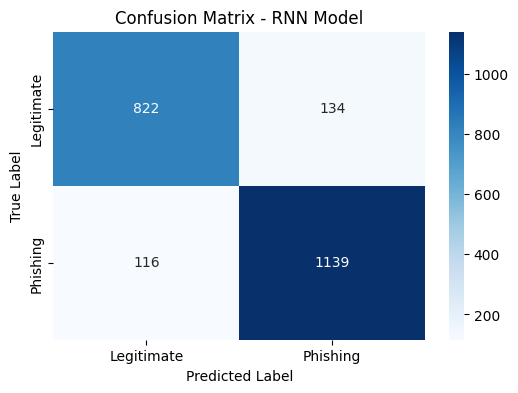

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       956
           1       0.89      0.91      0.90      1255

    accuracy                           0.89      2211
   macro avg       0.89      0.88      0.88      2211
weighted avg       0.89      0.89      0.89      2211


Evaluating CNN + ANN Model...

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


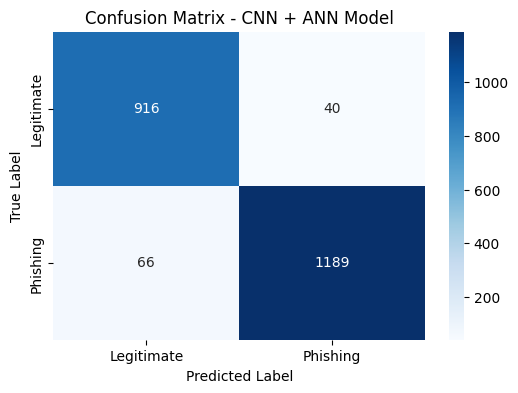

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       956
           1       0.97      0.95      0.96      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211


Evaluating CNN + RNN Model...

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


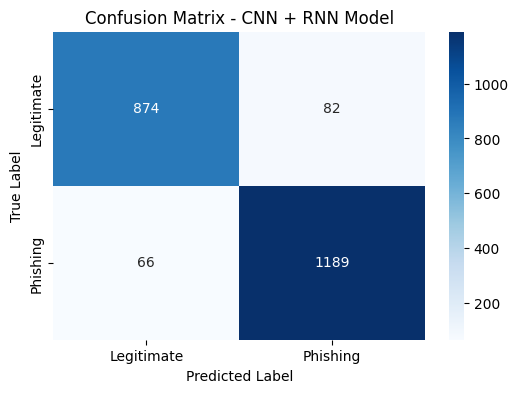

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       956
           1       0.94      0.95      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211


Evaluating CNN + RNN + ANN Model...

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


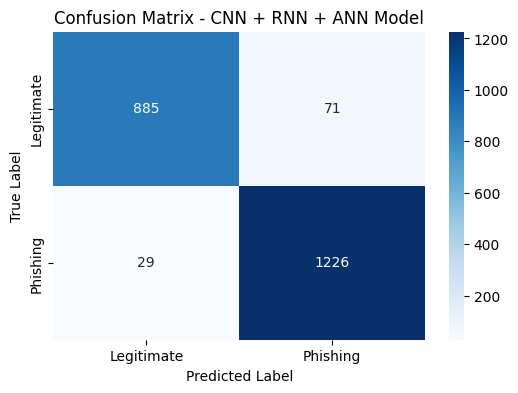

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       956
           1       0.95      0.98      0.96      1255

    accuracy                           0.95      2211
   macro avg       0.96      0.95      0.95      2211
weighted avg       0.96      0.95      0.95      2211



In [78]:
# Loop through each model and generate evaluation
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...\n")
    
    # Reshape input if necessary (for CNN/RNN models)
    if "CNN" in model_name or "RNN" in model_name:
        X_test_input = X_test_reshaped  # 3D input for CNN & RNN
    else:
        X_test_input = X_test  # 2D input for ANN
    
    # Special case for hybrid models (CNN + ANN or CNN + RNN + ANN)
    if "ANN" in model_name and ("CNN" in model_name or "RNN" in model_name):
        X_test_input = [X_test_reshaped, X_test]  # Ensure correct input structure

        # 🚨 Ensure batch sizes are the same 🚨
        if X_test_reshaped.shape[0] != X_test.shape[0]:
            print(f"Shape mismatch detected for {model_name}!")
            print(f"X_test_reshaped shape: {X_test_reshaped.shape}, X_test shape: {X_test.shape}")
            continue  # Skip model if input shape is incorrect

    # Generate predictions
    try:
        y_pred = (model.predict(X_test_input) > 0.5).astype("int32")
    except Exception as e:
        print(f"Error in {model_name}: {e}")
        continue  # Skip model if prediction fails

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Print classification report
    print(classification_report(y_test, y_pred))


Evaluating ANN Model...

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Evaluating CNN Model...

Error in CNN Model: as_list() is not defined on an unknown TensorShape.

Evaluating RNN Model...

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

Evaluating CNN + ANN Model...

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Evaluating CNN + RNN Model...

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

Evaluating CNN + RNN + ANN Model...

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

Best Performing Model: ANN Model (F1-Score: 0.9640)



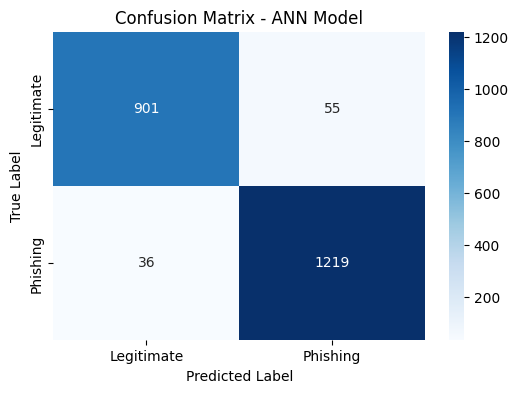

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       956
           1       0.96      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211


Best Performing Model: CNN + RNN + ANN Model (F1-Score: 0.9608)



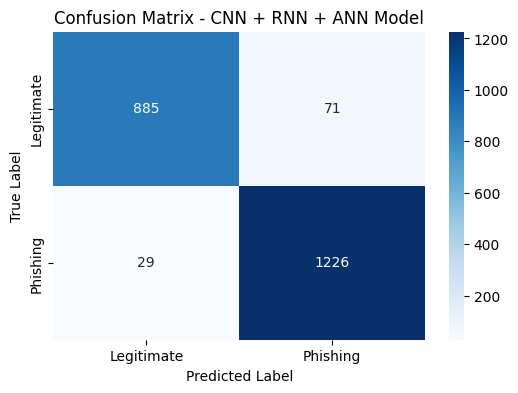

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       956
           1       0.95      0.98      0.96      1255

    accuracy                           0.95      2211
   macro avg       0.96      0.95      0.95      2211
weighted avg       0.96      0.95      0.95      2211


Best Performing Model: CNN + ANN Model (F1-Score: 0.9573)



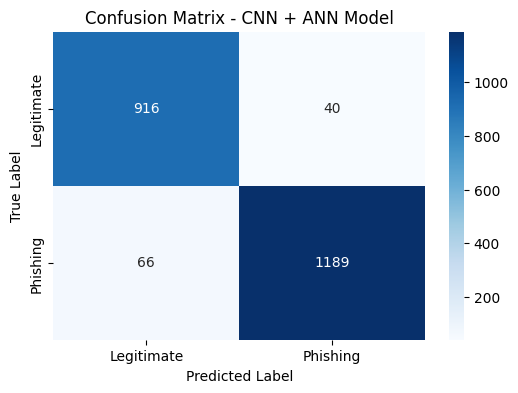

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       956
           1       0.97      0.95      0.96      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211


Best Performing Model: CNN + RNN Model (F1-Score: 0.9414)



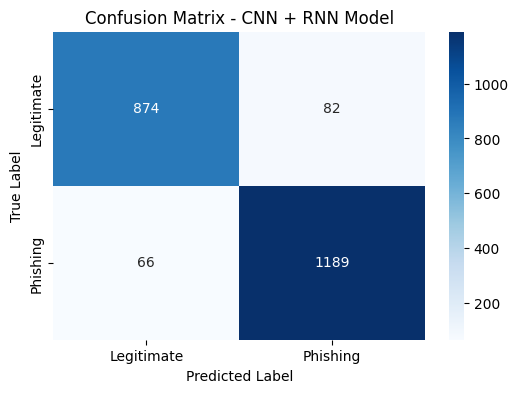

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       956
           1       0.94      0.95      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211


Best Performing Model: RNN Model (F1-Score: 0.9011)



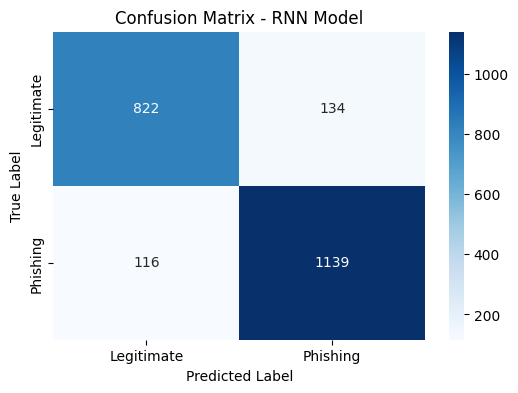

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       956
           1       0.89      0.91      0.90      1255

    accuracy                           0.89      2211
   macro avg       0.89      0.88      0.88      2211
weighted avg       0.89      0.89      0.89      2211



In [84]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store model performance
model_performance = {}

# Loop through each model and generate evaluation
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...\n")
    
    # Reshape input if necessary (for CNN/RNN models)
    if "CNN" in model_name or "RNN" in model_name:
        X_test_input = X_test_reshaped  # 3D input for CNN & RNN
    else:
        X_test_input = X_test  # 2D input for ANN
    
    # Special case for hybrid models (CNN + ANN or CNN + RNN + ANN)
    if "ANN" in model_name and ("CNN" in model_name or "RNN" in model_name):
        X_test_input = [X_test_reshaped, X_test]  # Ensure correct input structure

        # Ensure batch sizes are the same
        if X_test_reshaped.shape[0] != X_test.shape[0]:
            print(f"Shape mismatch detected for {model_name}!")
            print(f"X_test_reshaped shape: {X_test_reshaped.shape}, X_test shape: {X_test.shape}")
            continue  # Skip model if input shape is incorrect

    # Generate predictions
    try:
        y_pred = (model.predict(X_test_input) > 0.5).astype("int32")
    except Exception as e:
        print(f"Error in {model_name}: {e}")
        continue  # Skip model if prediction fails

    # Compute performance metrics
    f1 = f1_score(y_test, y_pred)
    model_performance[model_name] = {
        "f1_score": f1,
        "y_pred": y_pred
    }

# Sort models by F1-score in descending order
sorted_models = sorted(model_performance.items(), key=lambda x: x[1]["f1_score"], reverse=True)

# Print evaluation results in sorted order
for model_name, data in sorted_models:
    print(f"\nBest Performing Model: {model_name} (F1-Score: {data['f1_score']:.4f})\n")
    y_pred = data["y_pred"]
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Print classification report
    print(classification_report(y_test, y_pred))


In [1]:
cnn_rnn_ann_model.save('model.h5')

NameError: name 'cnn_rnn_ann_model' is not defined